In [6]:
#### Read data
Log2.Cor.Res.list <- readRDS("/data8t_4/JH/MyJobs/NormalCancer_scColon_V2/Log2.Cor.Res.list.dataset.rds")
Cor.Res.CV2000 <- Log2.Cor.Res.list$Cor.Res.CV2000
Cor.Res.CV1500 <- Log2.Cor.Res.list$Cor.Res.CV1500
Pheno.merged <- Log2.Cor.Res.list$Pheno.merged

In [4]:
###Distance normalization
Min_max_norm.1500<- base::apply(Cor.Res.CV1500$Cor.merged, 2, function(x){
  (x-min(x))/(max(x)-min(x))
})
Min_max_norm.2000<- base::apply(Cor.Res.CV2000$Cor.merged, 2, function(x){
  (x-min(x))/(max(x)-min(x))
})

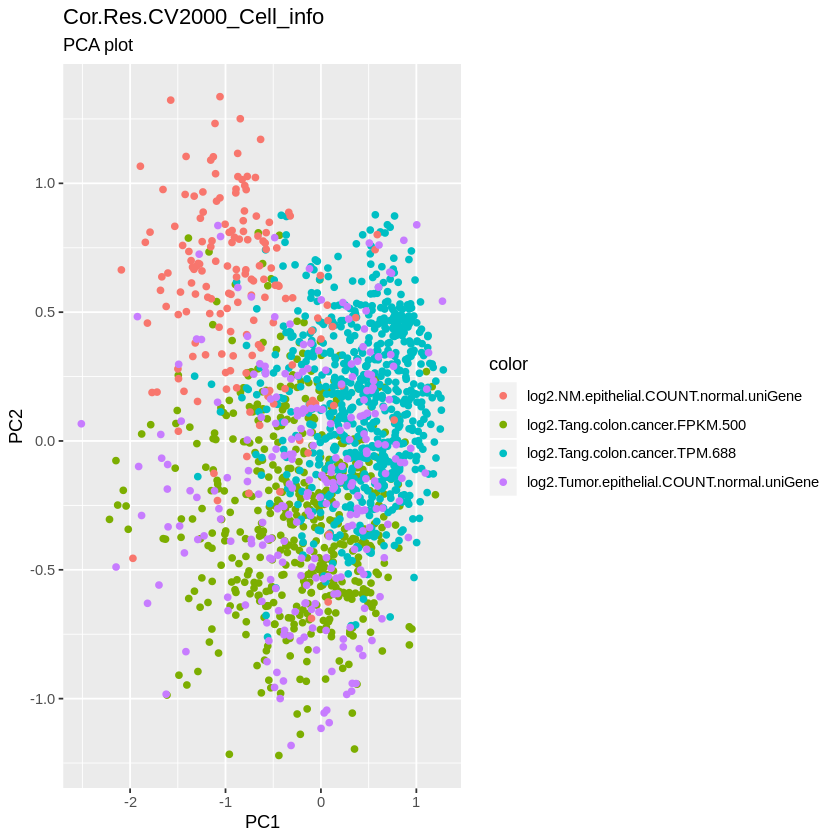

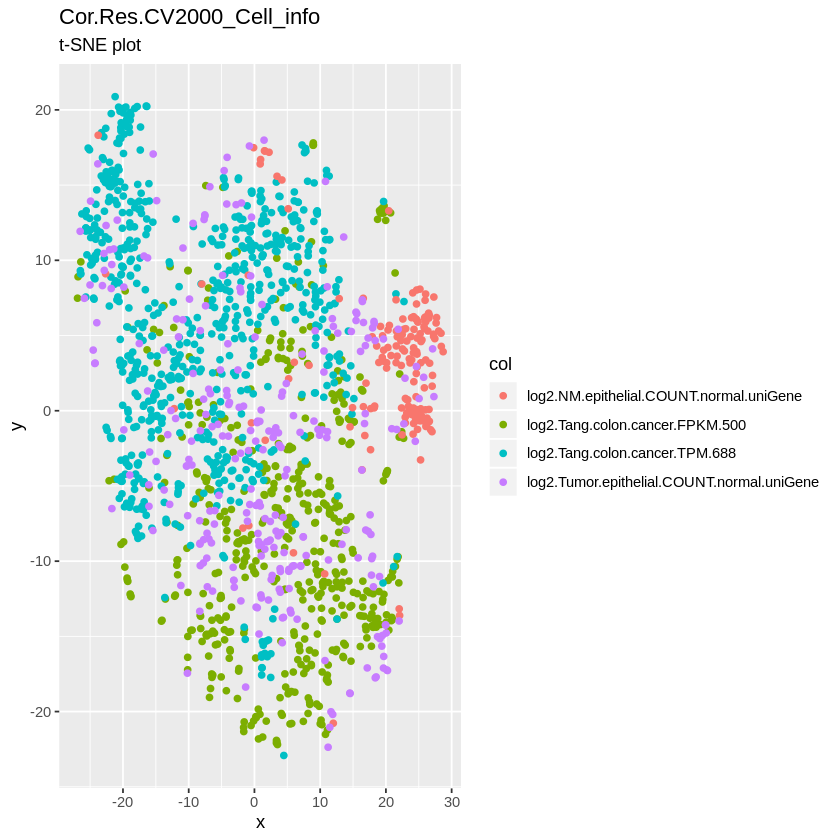

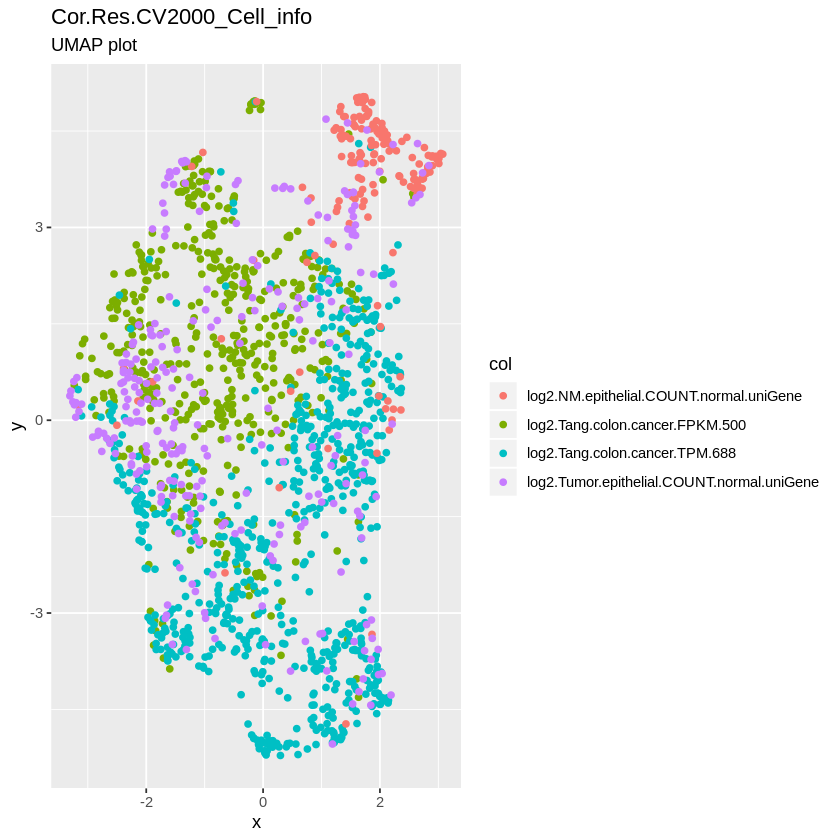

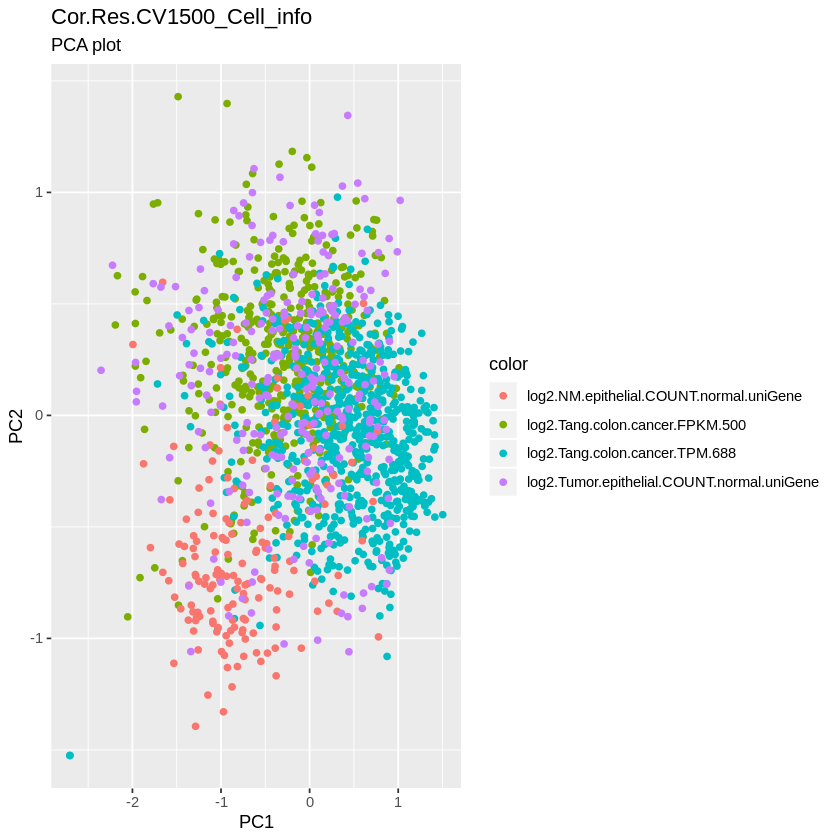

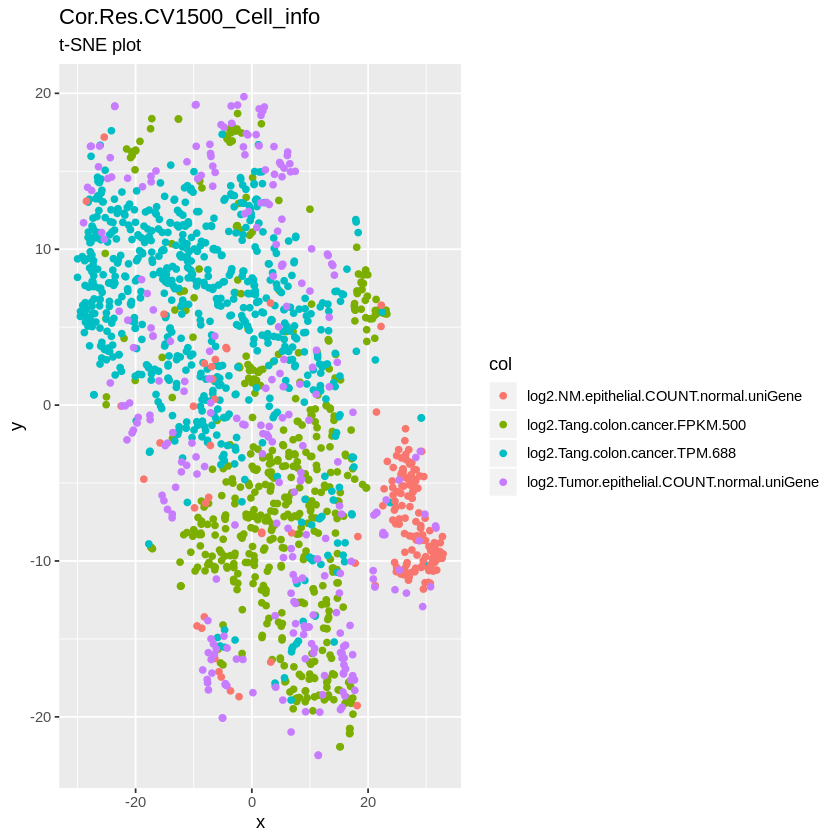

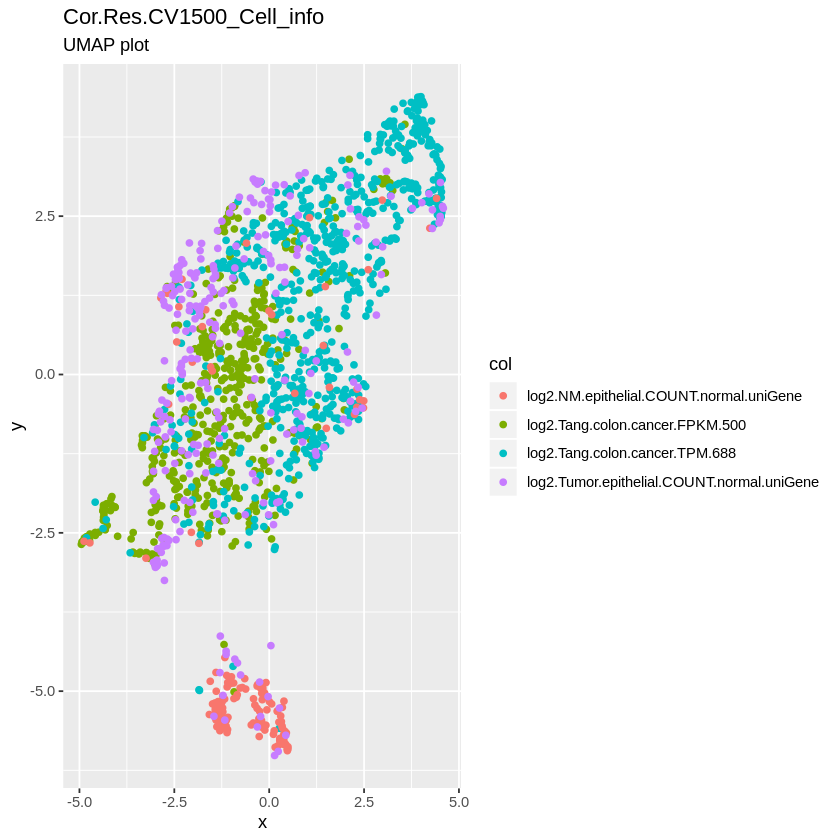

In [7]:
#### Distance Cluster
#### 1.Multiple dimension deduction plot of the data
source("/data8t_4/JH/MyJobs/1_R_script/R_Plot/DimeReduPlot.R")
DimeReduPlot(mx = Min_max_norm.2000, color = Pheno.merged$Cell_info, 
             tiltle = "Cor.Res.CV2000_Cell_info", print = T)
DimeReduPlot(mx = Min_max_norm.1500, color = Pheno.merged$Cell_info, 
             tiltle = "Cor.Res.CV1500_Cell_info", print = T,
             check_duplicates = FALSE)

Loading required package: pheatmap


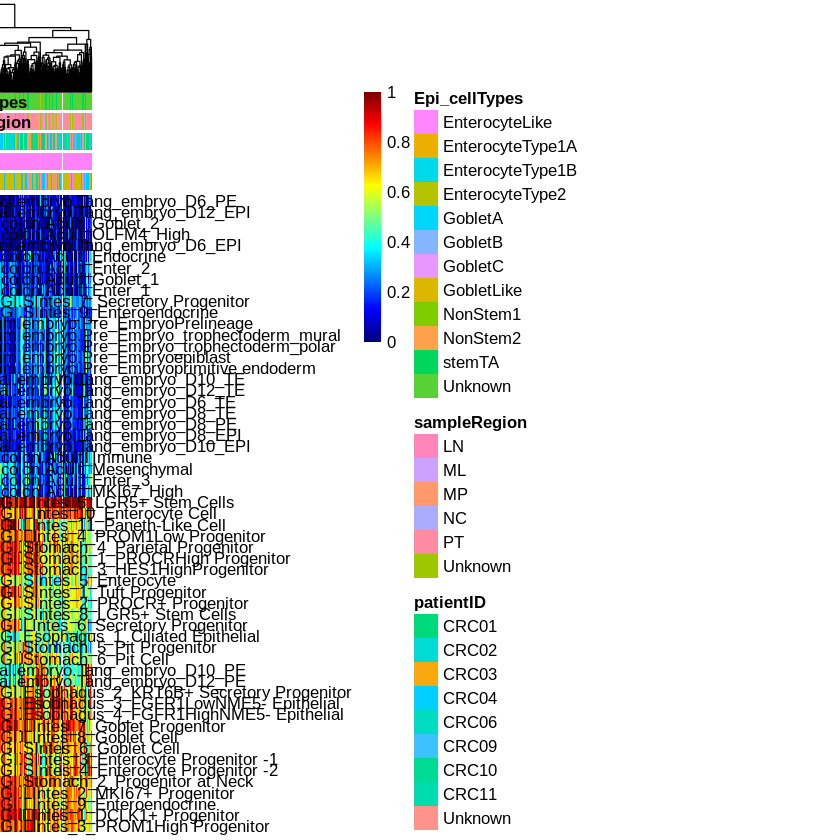

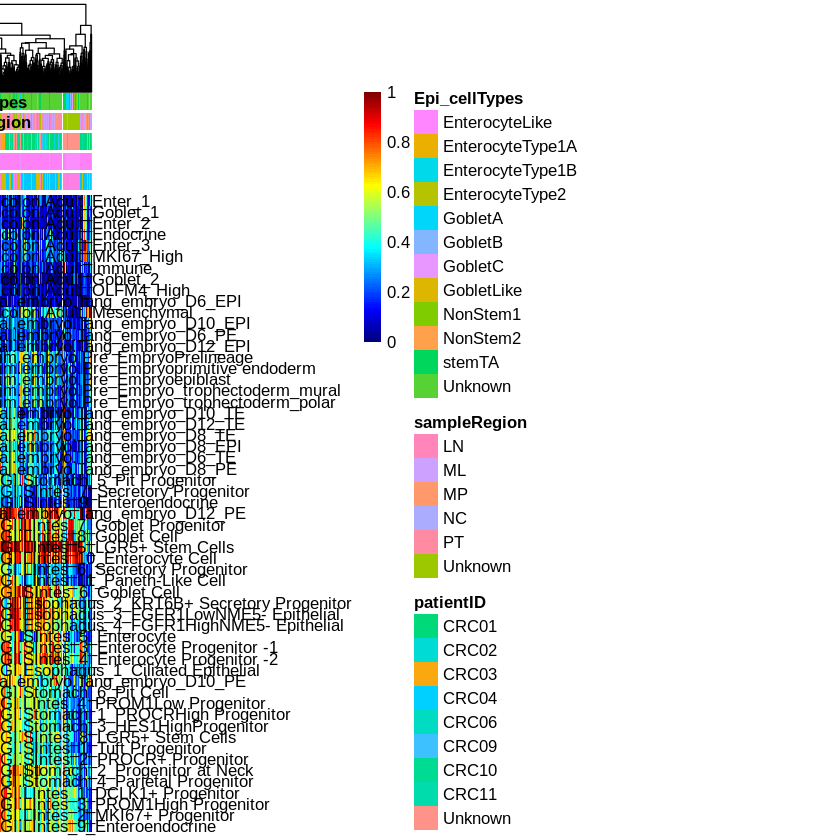

In [15]:
#### 2. Cluster and heatmap plot
source("/data8t_4/JH/MyJobs/1_R_script/R_Plot/heatmap.JH.R")
heatmap.JH(Min_max_norm.2000,show_colnames = F,
           annotation_col = Pheno.merged)
### replace the NA into 0
Min_max_norm.1500[is.na(Min_max_norm.1500)] <- 0
heatmap.JH(Min_max_norm.1500,show_colnames = F,
           annotation_col = Pheno.merged)

##### If remove normal cell, analysis using only tumor cells

In [10]:
Pheno.Tumor <- Pheno.merged[Pheno.merged$CellType == "Tumor cells",]

In [12]:
TumorCells <- rownames(Pheno.Tumor)

In [13]:
Tumor.norm.1500 <- Min_max_norm.1500[,TumorCells]
Tumor.norm.2000 <- Min_max_norm.2000[,TumorCells]

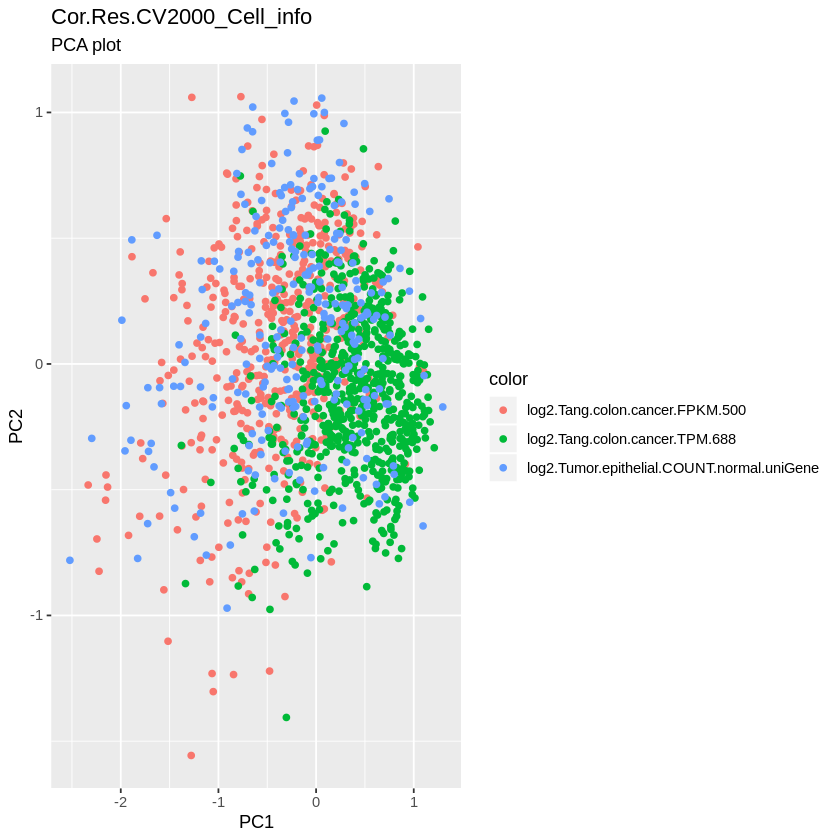

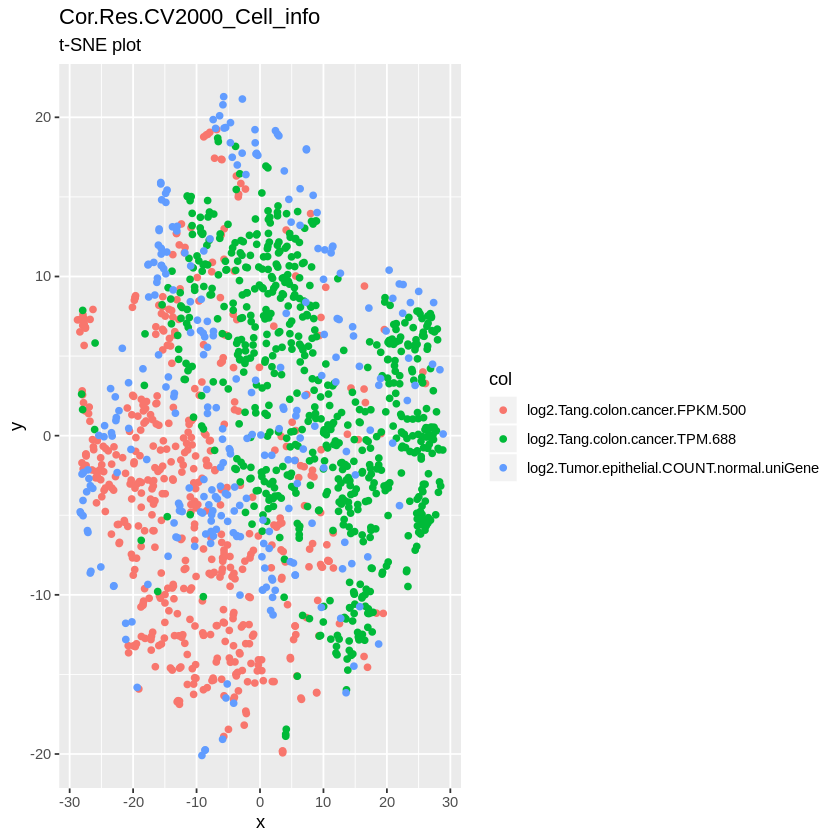

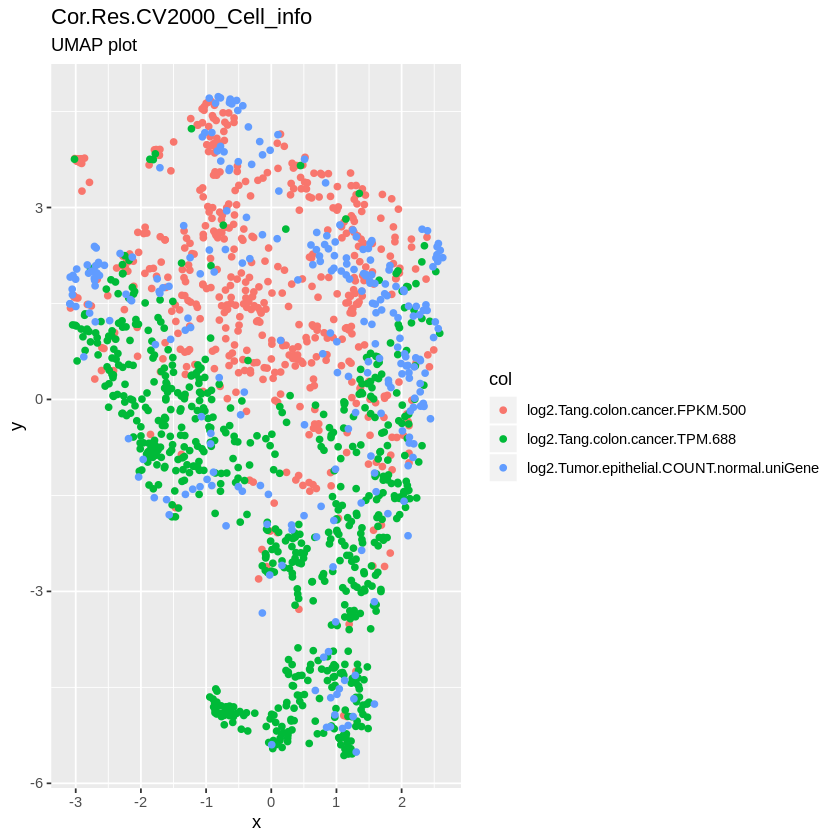

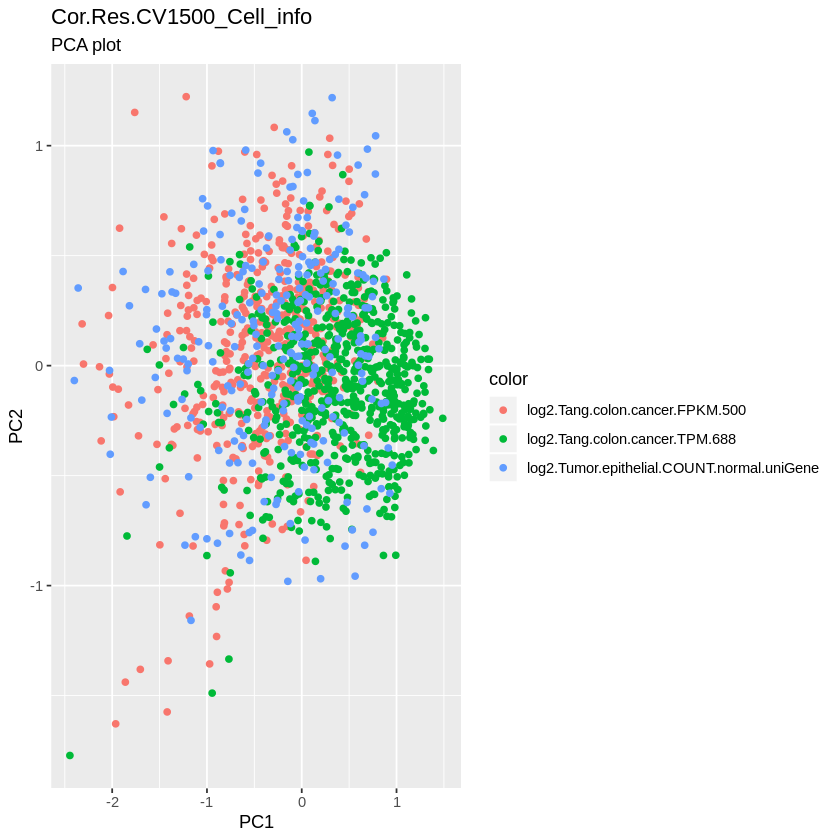

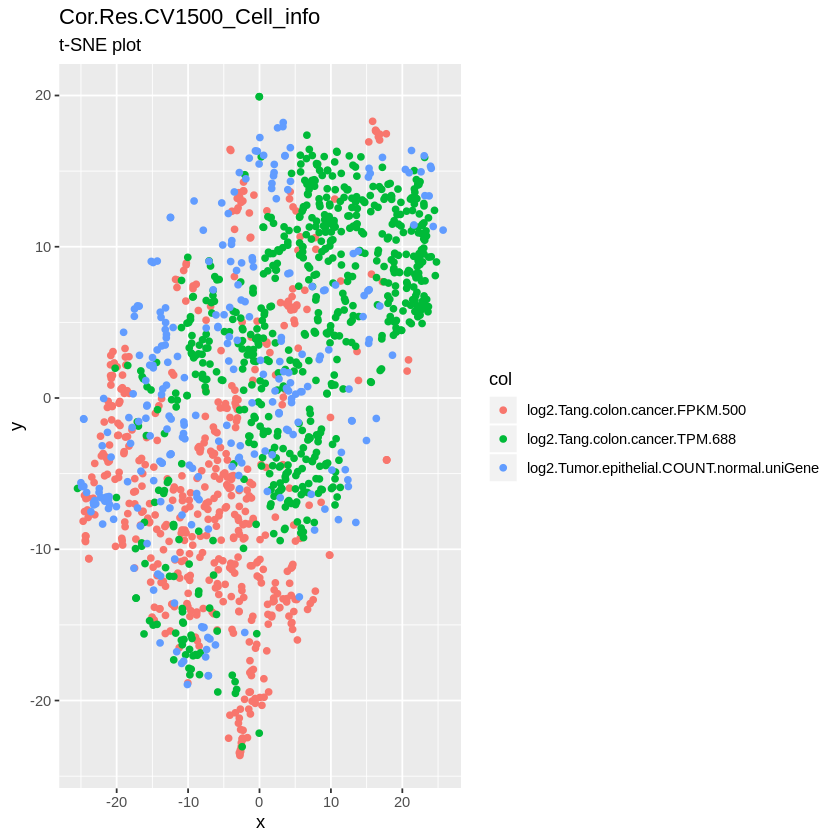

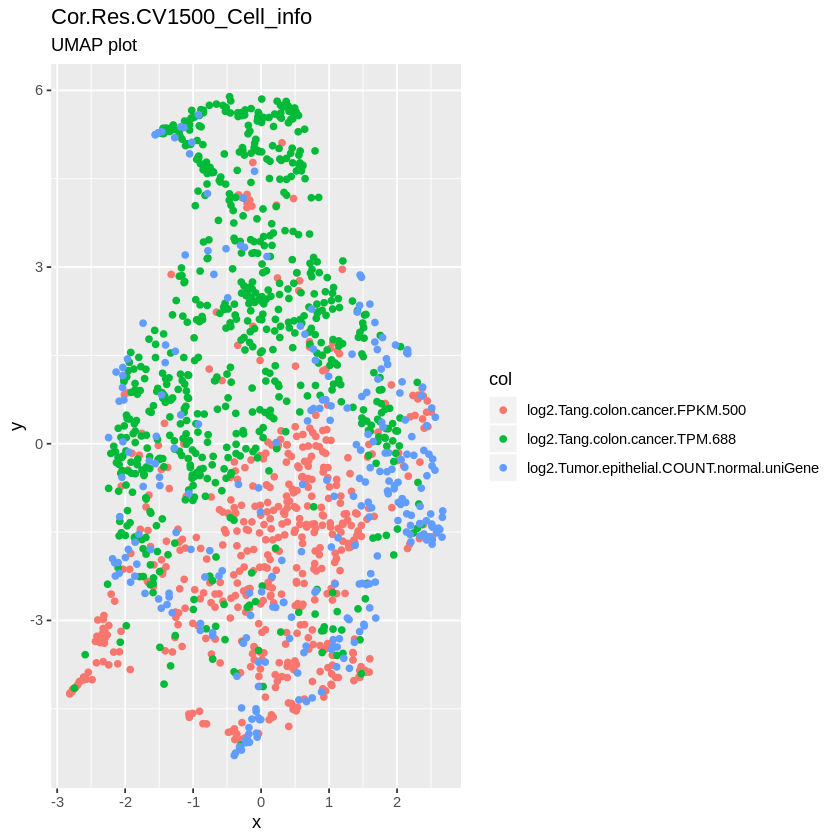

In [14]:
#### Distance Cluster
#### 1.Multiple dimension deduction plot of the data
source("/data8t_4/JH/MyJobs/1_R_script/R_Plot/DimeReduPlot.R")
DimeReduPlot(mx = Tumor.norm.2000, color = Pheno.Tumor$Cell_info, 
             tiltle = "Cor.Res.CV2000_Cell_info", print = T)
DimeReduPlot(mx = Tumor.norm.1500, color = Pheno.Tumor$Cell_info, 
             tiltle = "Cor.Res.CV1500_Cell_info", print = T,
             check_duplicates = FALSE)

In [23]:
#### 2. Cluster and heatmap plot
source("/data8t_4/JH/MyJobs/1_R_script/R_Plot/heatmap.JH.R")
heatmap.JH(Tumor.norm.2000,show_colnames = F,
           annotation_col = Pheno.Tumor, filename = "Tumor_heatmap_2000.pdf", width = 15)
### replace the NA into 0
Tumor.norm.1500[is.na(Tumor.norm.1500)] <- 0
heatmap.JH(Tumor.norm.1500,show_colnames = F,
           annotation_col = Pheno.Tumor,filename = "Tumor_heatmap_1500.pdf", width = 15)

#### Cluster using SC3

In [26]:
#### Cluster using SC3
source("/data8t_4/JH/MyJobs/1_R_script/NormalCancer/JH_SC3_cluster.R")
SC3_cluster_2000 <- JH_SC3_cluster(Tumor.norm.2000,Pheno.Tumor,ks=2:4)
hc_2000 <- SC3_cluster_2000$`3`$hc
SC3_cluster_1500 <- JH_SC3_cluster(Tumor.norm.1500,Pheno.Tumor,ks=2:4)
hc_1500 <- SC3_cluster_1500$`3`$hc

Setting SC3 parameters...
Calculating distances between the cells...
Performing transformations and calculating eigenvectors...
Performing k-means clustering...


Calculating consensus matrix...
Setting SC3 parameters...
Calculating distances between the cells...
Performing transformations and calculating eigenvectors...
Performing k-means clustering...


Calculating consensus matrix...


In [28]:
source("/data8t_4/JH/MyJobs/1_R_script/R_Plot/heatmap.JH.R")
heatmap.JH(Tumor.norm.2000,show_colnames = F,
           annotation_col = Pheno.merged[,c(1,2)], cluster_cols = hc_2000,filename = "Tumor_heatmap_2000_SC3.pdf", width = 15)
### replace the NA into 0
heatmap.JH(Tumor.norm.1500,show_colnames = F,
           annotation_col = Pheno.merged[,c(1,2)], cluster_cols = hc_1500,filename = "Tumor_heatmap_1500_SC3.pdf", width = 15)
